In [29]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [30]:
# Part-1 Data Preprocessing
# Pre-Processing Train set
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True)
training_set = train_datagen.flow_from_directory(directory=
        'D:\Sign Language dataset\Train',
        target_size = (64, 64),
        batch_size = 256,
        class_mode = 'categorical')

Found 23900 images belonging to 10 classes.


In [31]:
training_set[1]

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [32]:
# Pre-Processing the test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(directory='D:\Sign Language dataset\Test',
                                            target_size = (64, 64),
                                            batch_size = 256,
                                            class_mode = 'categorical')

Found 2000 images belonging to 10 classes.


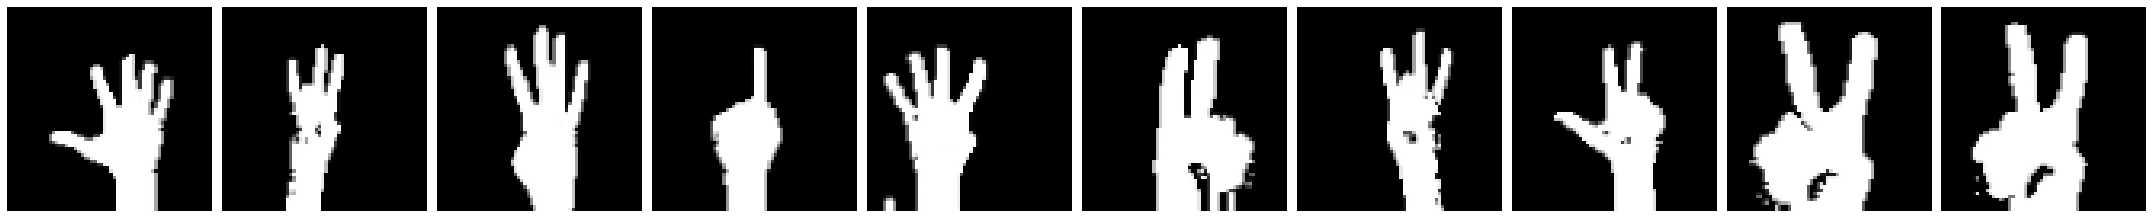

(256, 64, 64, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
imgs, labels = next(training_set)


#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)

In [34]:
imgs.shape

(256, 64, 64, 3)

# Part 2 Building CNN
# Initializing CNN
cnn = tf.keras.models.Sequential()

# Convolution & Max Pooling
cnn.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = [64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))

# Adding second layer
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))

# Adding Third layer
cnn.add(tf.keras.layers.Conv2D(filters = 128 , kernel_size = (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))
cnn.add(tf.keras.layers.Dropout(0.1))
# Flattening
cnn.add(tf.keras.layers.Flatten())

# Full Connection
# cnn.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.1))
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.1)) 
cnn.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
#cnn.add(Dropout(0.3))

# early stopping to avoid overfitting the model
early_stop = tf.keras.callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="auto", patience = 2, 
                                        restore_best_weights = True)


In [35]:
# Part 2 Building CNN
# Initializing CNN
cnn = tf.keras.models.Sequential()

# Convolution & Max Pooling
cnn.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = [64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))

# Adding second layer
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))

# Adding Third layer
cnn.add(tf.keras.layers.Conv2D(filters = 128 , kernel_size = (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))
cnn.add(tf.keras.layers.Dropout(0.4))
# Flattening
cnn.add(tf.keras.layers.Flatten())

# Full Connection
# cnn.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) 
cnn.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))


# early stopping to avoid overfitting the model
early_stop = tf.keras.callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="auto", patience = 2, 
                                        restore_best_weights = True)

In [36]:
# Part 3 Training CNN
# Compile CNN
opt = keras.optimizers.Adam(learning_rate = 0.01)
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics = ['accuracy'])

# Train CNN with the Train dataset and evaluating on Test dataset
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 20,callbacks = [early_stop])


Epoch 1/20
94/94 [==============================] - 102s 1s/step - loss: 1.2343 - accuracy: 0.6110 - val_loss: 1.8633 - val_accuracy: 0.4625
Epoch 2/20
94/94 [==============================] - 98s 1s/step - loss: 0.1088 - accuracy: 0.9613 - val_loss: 1.3657 - val_accuracy: 0.6215
Epoch 3/20
94/94 [==============================] - 106s 1s/step - loss: 0.0657 - accuracy: 0.9792 - val_loss: 1.1369 - val_accuracy: 0.7390
Epoch 4/20
94/94 [==============================] - 102s 1s/step - loss: 0.0502 - accuracy: 0.9832 - val_loss: 0.9956 - val_accuracy: 0.7185
Epoch 5/20
94/94 [==============================] - 107s 1s/step - loss: 0.0415 - accuracy: 0.9855 - val_loss: 0.7937 - val_accuracy: 0.7830
Epoch 6/20
94/94 [==============================] - 103s 1s/step - loss: 0.0446 - accuracy: 0.9867 - val_loss: 0.5631 - val_accuracy: 0.8015
Epoch 7/20
94/94 [==============================] - 95s 1s/step - loss: 0.0362 - accuracy: 0.9897 - val_loss: 1.1028 - val_accuracy: 0.6595
Epoch 8/20
94/9

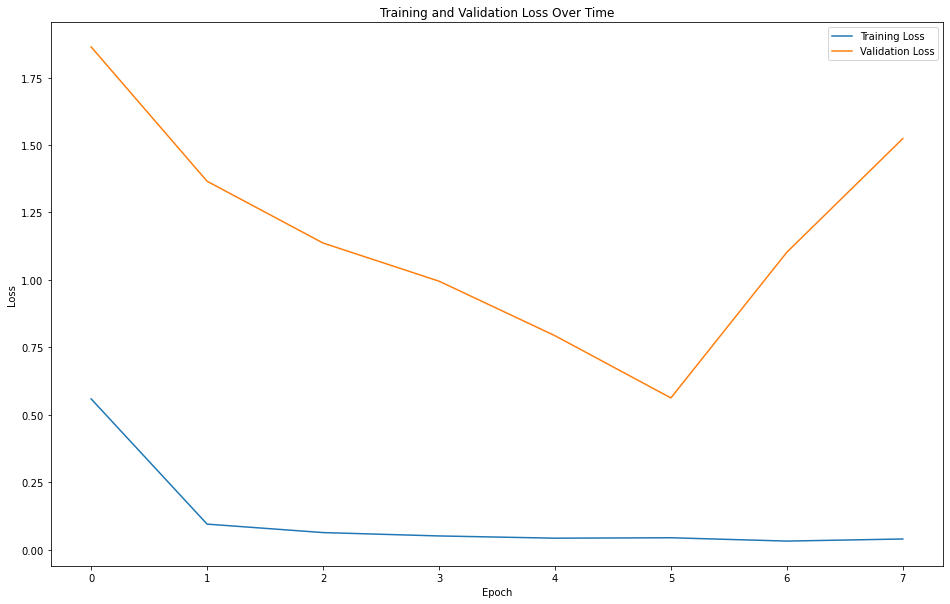

In [37]:
# plotting the Training loss and validation loss
plt.figure(figsize=(16, 10))

epochs_range = range(len(history.history['loss']))

plt.plot(epochs_range, history.history['loss'], label="Training Loss")
plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Time")
plt.show()

In [38]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 64)        9280      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 6, 6, 128)        

In [89]:
testing_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory(directory='D:\Sign Language dataset\Test',
                                            target_size = (64, 64),
                                            batch_size = 2000,
                                            class_mode = 'categorical')

Found 2000 images belonging to 10 classes.


In [90]:
X_test ,Y_test = testing_set.next()

In [91]:
cnn.evaluate(X_test,Y_test) #80% accuracy

63/63 [==============================] - 2s 22ms/step - loss: 0.5631 - accuracy: 0.8015


[0.5631306767463684, 0.8015000224113464]

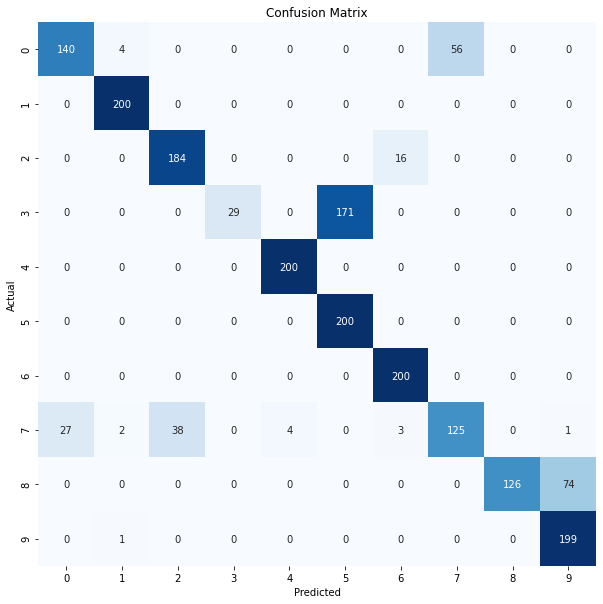

In [92]:
y_pred = np.argmax(cnn.predict(X_test), axis=1)
y_test = np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [87]:
from sklearn.metrics import multilabel_confusion_matrix
def evaluate_model(model, X_test, y_test):
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_test = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [45]:
# cnn.save('Final_CNN_Model.h5')